# TASK 3

- Find the zip file for the task named “Pizza+Place+Sales.zip” in the Datasets folder on the drive. It contains four CSV files: Orders, Order Details, Pizzas, and Pizza Types. You’ll also find a data dictionary that describes each dataset
  
**Tip:** You can join the four CSV files into a single data frame before you start your analysis.

**Pizza Place Sales**
- A year's worth of sales from a fictitious pizza place, including the date and time of each order and the pizzas served, with additional details on the type, size, quantity, price, and ingredients.


### Import Libraries

In [4]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load Datasets

In [6]:
# Reading the Orders dataset
df_orders = pd.read_csv(r"C:\Users\olago\Documents\Data Science Journey\TechCrush\Pizza+Place+Sales\pizza_sales\orders.csv")

# Reading the Order Details dataset
df_order_details = pd.read_csv(r"C:\Users\olago\Documents\Data Science Journey\TechCrush\Pizza+Place+Sales\pizza_sales\order_details.csv")

# Reading the Pizzas dataset
df_pizzas = pd.read_csv(r"C:\Users\olago\Documents\Data Science Journey\TechCrush\Pizza+Place+Sales\pizza_sales\pizzas.csv")

# Reading the Pizza Types dataset
df_pizza_types = pd.read_csv(r"C:\Users\olago\Documents\Data Science Journey\TechCrush\Pizza+Place+Sales\pizza_sales\pizza_types.csv", 
                             encoding="cp1252")

In [7]:
# Viewing the Orders dataframe head
df_orders.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [8]:
# Viewing the Order Details dataframe head
df_order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [9]:
# Viewing the Pizzas dataframe head
df_pizzas.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [10]:
# Viewing the Pizza Types dataframe head
df_pizza_types.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,..."
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno ..."
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A..."
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garli..."
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Ja..."


### Joining all dataframes using their related columns

In [12]:
# Merging orders with order_details (on order_id)
orders_details = df_orders.merge(df_order_details, on="order_id")

# Merging the resultant orders_details above with pizzas (on pizza_id)
orders_pizzas = orders_details.merge(df_pizzas, on="pizza_id")

# Merging the resultant orders_pizzas above with pizza_types (on pizza_type_id)
df_master = orders_pizzas.merge(df_pizza_types, on="pizza_type_id")

# Displaying all the four datasets that have being merged
df_master.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O..."


### Exploratory Data Analysis

In [14]:
df_master.shape

(48620, 12)

- The pizza place sales master dataframe has **48,260 Rows** and **12 Columns**.

In [16]:
# Exploring the details of our master dataframe
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          48620 non-null  int64  
 1   date              48620 non-null  object 
 2   time              48620 non-null  object 
 3   order_details_id  48620 non-null  int64  
 4   pizza_id          48620 non-null  object 
 5   quantity          48620 non-null  int64  
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


- There are **three(3), one(1), and eight(8) attributes** in the pizza place sales master dataframe are **int64, float64, and object data types** respectively.

In [18]:
# Exploring the statistical details
df_master.describe()

,order_id,order_details_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,10701.479761,24310.500000,1.019622,16.494132
std,6180.119770,14035.529381,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,5337.000000,12155.750000,1.000000,12.750000
50%,10682.500000,24310.500000,1.000000,16.500000
75%,16100.000000,36465.250000,1.000000,20.250000
max,21350.000000,48620.000000,4.000000,35.950000


- The **smallest and highest number of order** is **1 and 4** respectively.
- The **cheapest and most expensive pizza** is **9.75 and 35.95** respectively.

In [20]:
# Checking for missing / null values.
df_master.isna().sum()

order_id            0
date                0
time                0
order_details_id    0
pizza_id            0
quantity            0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

- There are **no missing / null values** in the pizza place sales dataframe.

In [22]:
# Checking if there are duplicated values
df_master.duplicated().sum()

0

- **There are no duplicated values in the pizza place sales dataframe.**

----

## Recommended Analysis

### 1. What is the total revenue/sales?

In [27]:
# Creating a calculated attribute called 'revenue'
df_master["revenue"] = df_master["quantity"] * df_master["price"] 

In [28]:
df_master.head()

,order_id,date,time,order_details_id,pizza_id,quantity,pizza_type_id,size,price,name,category,ingredients,revenue
0,1,2015-01-01,11:38:36,1,hawaiian_m,1,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",13.25
1,2,2015-01-01,11:57:40,2,classic_dlx_m,1,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",16.00
2,2,2015-01-01,11:57:40,3,five_cheese_l,1,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",18.50
3,2,2015-01-01,11:57:40,4,ital_supr_l,1,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",20.75
4,2,2015-01-01,11:57:40,5,mexicana_m,1,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",16.00


In [29]:
# Calculating the total revenue generated from the pizza place sales
total_revenue = df_master["revenue"].sum()
print(f"The total revenue is: {total_revenue}")

The total revenue is: 817860.05


### 2. Find the total quantity sold.

In [31]:
# Calculating the total quantity of pizza sold 
total_quantity_sold = df_master["quantity"].sum()
print(f"The total quantity sold is: {total_quantity_sold}")

The total quantity sold is: 49574


### 3. Find the total orders.

In [33]:
# Calculating the total number of unique orders placed.
total_orders = df_master["order_id"].nunique()
print(f"The total orders is: {total_orders}")

The total orders is: 21350


### 4. How many pizza types do they sell?

In [35]:
# Calculating the total pizza types sold
pizza_type_sold = df_master["pizza_type_id"].nunique()
print(f"The total number of pizza type sold is: {pizza_type_sold}")

The total number of pizza type sold is: 32


### 5. Find the average price of the pizzas.

In [37]:
# Calculating the total average pizza price
avg_price = df_master["price"].mean()
print(f"The average price of the pizzas is: {avg_price: .2f}")

The average price of the pizzas is:  16.49


### 6. What are the peak hours of sales?

In [39]:
# Converting time column to time format since it was originally in object type
df_master['time'] = pd.to_datetime(df_master['time'], format='%H:%M:%S').dt.time

# Extracting and creating hour column from our time
df_master['hour'] = pd.to_datetime(df_master['time'], format='%H:%M:%S').dt.hour

# Aggregating revenue(sales) by hour
hourly_revenue = df_master.groupby("hour")["revenue"].sum().reset_index()

#Displaying the hourly revenue dataframe
hourly_revenue

,hour,revenue
0,9,83.00
1,10,303.65
2,11,44935.80
3,12,111877.90
4,13,106065.70
5,14,59201.40
6,15,52992.30
7,16,70055.40
8,17,86237.45
9,18,89296.85


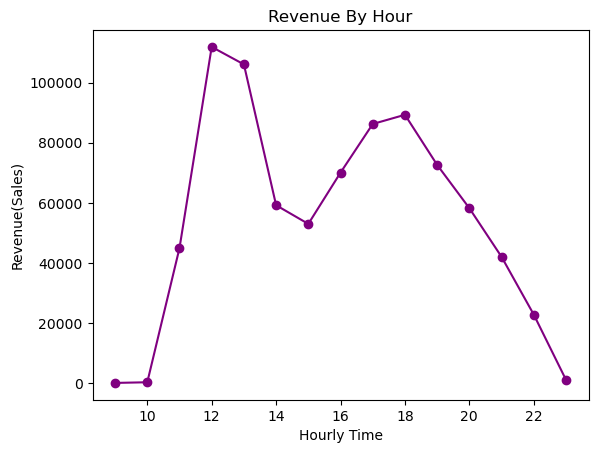

In [40]:
plt.plot(hourly_revenue["hour"], hourly_revenue["revenue"], color="purple", marker='o')
plt.title("Revenue By Hour")
plt.xlabel("Hourly Time")
plt.ylabel("Revenue(Sales)")

plt.show()

- **The peak hour of sales is 12:00 hours.**

### 7. Find the total sales made on each day of the week. Which day of the week is when sales are made the most?

In [43]:
# Defining the correct weekday order as the first one I ran was ordered alphabetically
ordered_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Converting date column to date format since it was originally in object type
df_master['date'] = pd.to_datetime(df_master['date'], format='%Y-%m-%d')

# Extracting and creating weekday column from our date
df_master['day_of_week'] = df_master['date'].dt.day_name()

# Aggregating revenue(sales) by weekday
weekday_revenue = df_master.groupby("day_of_week")["revenue"].sum().reset_index()

# Converting my day of week to categorical with order
weekday_revenue["day_of_week"] = pd.Categorical(weekday_revenue["day_of_week"],categories=ordered_days,ordered=True)

# Sorting by the categorical order I made
weekday_revenue = weekday_revenue.sort_values("day_of_week").reset_index(drop=True)

#Displaying the hourly revenue dataframe
weekday_revenue

,day_of_week,revenue
0,Monday,107329.55
1,Tuesday,114133.80
2,Wednesday,114408.40
3,Thursday,123528.50
4,Friday,136073.90
5,Saturday,123182.40
6,Sunday,99203.50


- **The total sales for Monday, Tuesday, Wednesday, Thursday, Friday, Saturday, and Sunday are 107329.55, 114133.80, 114408.40, 123528.50, 136073.90, 123182.40, and 99203.50 respectively.**

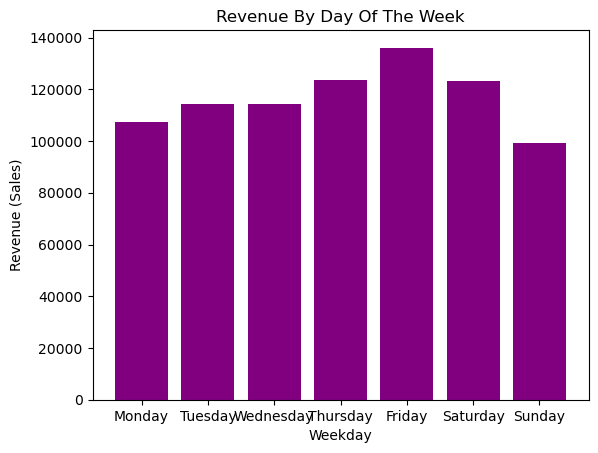

In [45]:
plt.bar(weekday_revenue["day_of_week"], weekday_revenue["revenue"], color="purple")

plt.title("Revenue By Day Of The Week")
plt.xlabel("Weekday")
plt.ylabel("Revenue (Sales)")

plt.show()

- **The day of the week with the most sales of pizza is Friday with $13,6073.90.**

### 8. Find the top 5 bestselling pizzas.

In [48]:
# Aggregating revenue(sales) by pizza_name
Top5_pizzas = df_master.groupby("name")["revenue"].sum().sort_values(ascending=False).head(5).reset_index()

#Displaying the top 5 bestselling pizzas by revenue dataframe
Top5_pizzas

,name,revenue
0,The Thai Chicken Pizza,43434.25
1,The Barbecue Chicken Pizza,42768.00
2,The California Chicken Pizza,41409.50
3,The Classic Deluxe Pizza,38180.50
4,The Spicy Italian Pizza,34831.25


- **The 5 best selling pizzas are: The Thai Chicken Pizza, The Barbecue Chicken Pizza, The California Chicken Pizza, The Classic Deluxe Pizza, The Spicy Italian Pizza.**

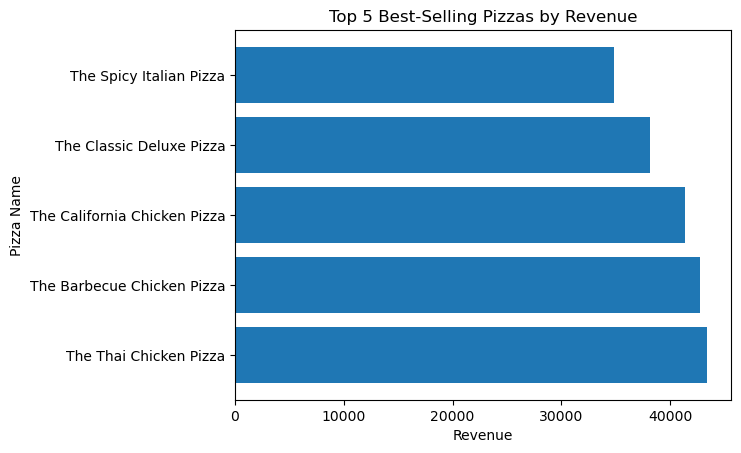

In [50]:
plt.barh(Top5_pizzas['name'], Top5_pizzas['revenue'])
plt.xlabel('Revenue')
plt.ylabel('Pizza Name')
plt.title('Top 5 Best-Selling Pizzas by Revenue')

plt.show()

### 9. Find the sales made in each month. Any trend noticeable?

In [52]:
# Defining the correct month order
ordered_months = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Converting date column to date format since it was originally in object type
df_master['date'] = pd.to_datetime(df_master['date'], format='%Y-%m-%d')

# Extracting and creating month column from our date
df_master['month'] = df_master['date'].dt.month_name()

# Aggregating revenue(sales) by month
monthly_revenue = df_master.groupby("month")["revenue"].sum().reset_index()

# Converting my month to categorical with order
monthly_revenue["month"] = pd.Categorical(monthly_revenue["month"],categories=ordered_months,ordered=True)

# Sorting by the categorical order I made
monthly_revenue = monthly_revenue.sort_values("month").reset_index(drop=True)

#Displaying the hourly revenue dataframe
monthly_revenue

,month,revenue
0,January,69793.30
1,February,65159.60
2,March,70397.10
3,April,68736.80
4,May,71402.75
5,June,68230.20
6,July,72557.90
7,August,68278.25
8,September,64180.05
9,October,64027.60


- **The sales made in each month are showed in the dataframe(table) above.**

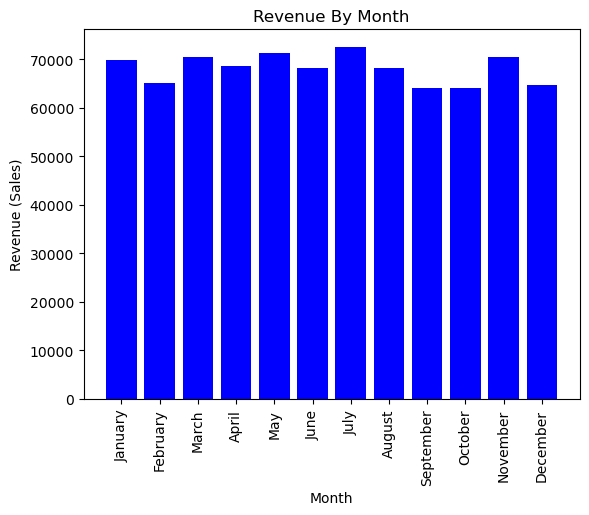

In [54]:
plt.bar(monthly_revenue["month"], monthly_revenue["revenue"], color="blue")

plt.title("Revenue By Month")
plt.xlabel("Month")
plt.ylabel("Revenue (Sales)")
plt.xticks(rotation=90)

plt.show()

- **Noticeable Trend:** ***There has been a consistent alternating rise and fall in the monthly sales from January till September, while September and October experience even sales and the alternating rise or fall trend continued after October.***

### 10. Are there pizza types that are not doing well on the menu?

In [57]:
# Aggregating revenue(sales) by pizza_name
Bottom5_pizzas = df_master.groupby("name")["revenue"].sum().sort_values(ascending=True).head(5).reset_index()

#Displaying the Bottom 5 worstselling pizzas by revenue dataframe
Bottom5_pizzas

,name,revenue
0,The Brie Carre Pizza,11588.50
1,The Green Garden Pizza,13955.75
2,The Spinach Supreme Pizza,15277.75
3,The Mediterranean Pizza,15360.50
4,The Spinach Pesto Pizza,15596.00


- **These are the worst 5 selling pizzas: The Brie Carre Pizza with the worst sales of 11588.50, followed by, The Green Garden Pizza with 13955.75, then, The Spinach Supreme Pizza with 15277.75, then The Mediterranean Pizza with 15360.50, and The Spinach Pesto Pizza with 15596.00.**

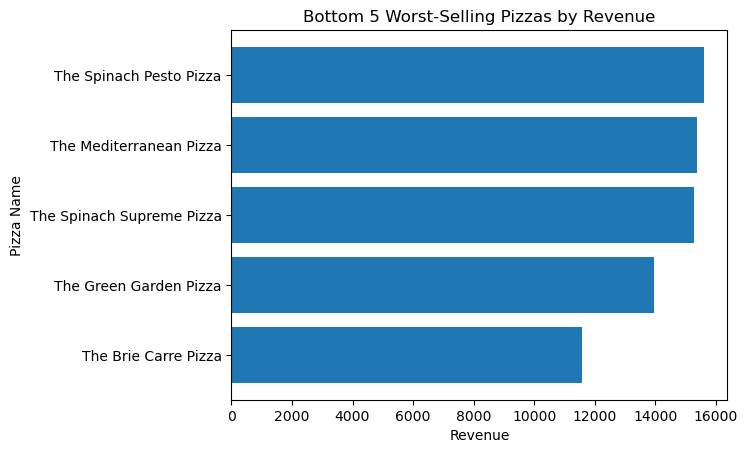

In [59]:
plt.barh(Bottom5_pizzas['name'], Bottom5_pizzas['revenue'])
plt.xlabel('Revenue')
plt.ylabel('Pizza Name')
plt.title('Bottom 5 Worst-Selling Pizzas by Revenue')

plt.show()